## Health Study

### Part 1

Validated the dataset structure (dimensions, column names, data types) and checked for missing values. \
No missing values were detected and the categorical variables (sex, smoker, disease) contain expected categories only.\
Therefore, no cleaning or imputation is required and we work with the original DataFrame.
To ensure reproducibility, set a fixed random seed and use a consistent execution environment.\

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

DATA_PATH = "../data/health_study_dataset.csv" 
df = pd.read_csv(DATA_PATH)

df.head() #check initial values in data


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


Check that the dataset loaded correctly by checking dimensions (rows and columns).

In [2]:
print(f"Rows: {df.shape[0]} \nColumns: {df.shape[1]}")

Rows: 800 
Columns: 9


Check if expected columns are present and correctly named. 

In [3]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'systolic_bp', 'cholesterol',
       'smoker', 'disease'],
      dtype='object')

Check expected data types and no missing values. Type conversions or data cleaning not needed at this point.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


No missing values were detected in any column. No need to add or remove and we use the original data as is.

In [5]:
df.isna().sum()


id             0
age            0
sex            0
height         0
weight         0
systolic_bp    0
cholesterol    0
smoker         0
disease        0
dtype: int64

Check categorical variables contain only expected values. Grouped analysis should be ok.

In [6]:
df["sex"].value_counts(dropna=False)

sex
F    403
M    397
Name: count, dtype: int64

In [7]:
df["smoker"].value_counts(dropna=False)

smoker
No     587
Yes    213
Name: count, dtype: int64

In [8]:
df["disease"].value_counts(dropna=False)

disease
0    753
1     47
Name: count, dtype: int64

Summary output with mean, median, min and max values. All inside plausible ranges for each column.

In [9]:
columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]

summary_stats = {}

for col in columns:
    summary_stats[col] = {
        "mean": df[col].mean(),
        "median": df[col].median(),
        "min": df[col].min(),
        "max": df[col].max()
    }
    print(f"{col.capitalize()}: | Mean = {summary_stats[col]["mean"]:.2f} | Median = {summary_stats[col]["median"]:.2f} | Min = {summary_stats[col]["min"]:.2f} | Max = {summary_stats[col]["max"]:.2f} |")

pd.DataFrame(summary_stats)

Age: | Mean = 49.43 | Median = 50.00 | Min = 18.00 | Max = 90.00 |
Weight: | Mean = 73.41 | Median = 73.20 | Min = 33.70 | Max = 114.40 |
Height: | Mean = 171.85 | Median = 171.35 | Min = 144.40 | Max = 200.40 |
Systolic_bp: | Mean = 149.18 | Median = 149.40 | Min = 106.80 | Max = 185.90 |
Cholesterol: | Mean = 4.93 | Median = 4.97 | Min = 2.50 | Max = 7.88 |


,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
median,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


A even more simplistic wy would be to do a .describe()

In [10]:
df[columns].describe() #if just using describe

,age,weight,height,systolic_bp,cholesterol
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,49.426250,73.413000,171.849250,149.178625,4.929150
std,14.501118,13.685059,9.804259,12.793360,0.848413
min,18.000000,33.700000,144.400000,106.800000,2.500000
25%,39.000000,64.800000,164.775000,140.900000,4.327500
50%,50.000000,73.200000,171.350000,149.400000,4.970000
75%,59.000000,82.600000,178.925000,157.600000,5.482500
max,90.000000,114.400000,200.400000,185.900000,7.880000


The distribution of systolic blood pressure with most values concentrated in a plausible range.\
No extreme outliers, suggests that the sample is representative of a adult population.

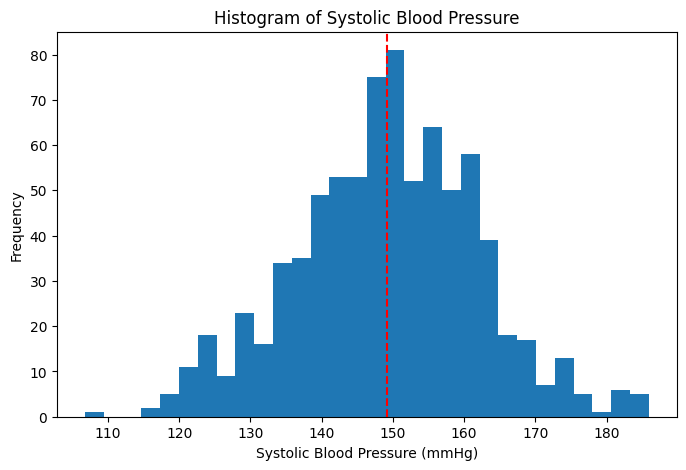

In [34]:
plt.figure(figsize=(8, 5))
plt.hist(df["systolic_bp"], bins=30)
plt.axvline(df["systolic_bp"].mean(), color = "red", linestyle = "--")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.title("Histogram of Systolic Blood Pressure")
plt.show()

The boxplot shows differences in the median and spread of weight between females and males.\
Some outliers are visible, which is expected.

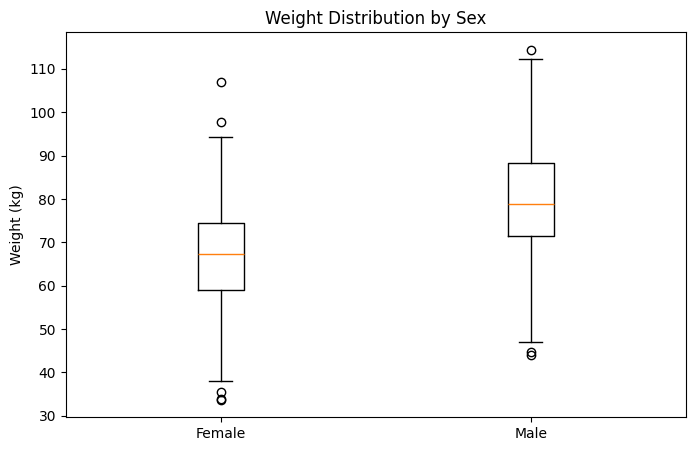

In [12]:
weights_female = df[df["sex"] == "F"]["weight"]
weights_male = df[df["sex"] == "M"]["weight"]

plt.figure(figsize=(8, 5))
plt.boxplot([weights_female, weights_male], tick_labels=["Female", "Male"])
plt.ylabel("Weight (kg)")
plt.title("Weight Distribution by Sex")
plt.show()

Most participants are non-smokers, with a smaller proportion reporting smoking.

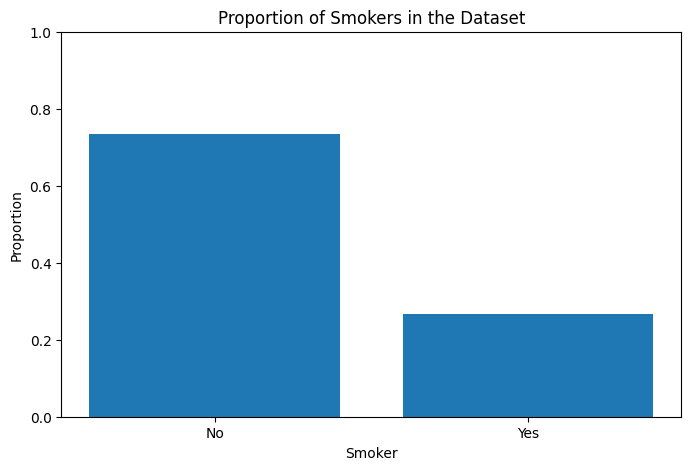

,count,proportion
smoker,,
No,587,0.73375
Yes,213,0.26625


In [13]:
smoker_counts = df["smoker"].value_counts()
smoker_proportions = smoker_counts / len(df)

plt.figure(figsize=(8, 5))
plt.bar(smoker_proportions.index, smoker_proportions.values)
plt.ylabel("Proportion")
plt.xlabel("Smoker")
plt.title("Proportion of Smokers in the Dataset")
plt.ylim(0, 1)
plt.show()

counts = df["smoker"].value_counts(dropna=False)
proportions = df["smoker"].value_counts(normalize=True, dropna=False)

pd.DataFrame({"count": counts,"proportion": proportions})


Disease rate in the dataset.

In [14]:
observed_disease_rate = df["disease"].mean()

print(f"Observed disease: {observed_disease_rate:.4f} ({observed_disease_rate:.2%})")
print(f"Equal to {df["disease"].sum()} out of {len(df)} participants.")


Observed disease: 0.0587 (5.88%)
Equal to 47 out of 800 participants.


## Simulation
Each simulated individual is assumed to have the same probability of disease as observed (observed_disease_rate) in the dataset.\
The simulation treats disease occurrence as a Bernoulli process and illustrates expected variation due to randomness.

In [15]:
n_simulated = 1000

simulated_disease = np.random.binomial(n=1, p=observed_disease_rate, size=n_simulated)

simulated_disease_rate = simulated_disease.mean()

print(f"Observed disease prevalence:  {observed_disease_rate:.2%}")
print(f"Simulated disease prevalence: {simulated_disease_rate:.2%} (in n={n_simulated})")
print("Difference is expected due to random sampling variation.")


Observed disease prevalence:  5.88%
Simulated disease prevalence: 5.60% (in n=1000)
Difference is expected due to random sampling variation.


To estimate a confidence interval for the mean systolic blood pressure with bootstrapping.\
This involves repeatedly resampling the observed blood pressure values with replacement and computing the mean for each resample.\
The array bootstrap_means represents an empirical sampling distribution of the mean systolic blood pressure, obtained via repeated resampling of the observed data.

In [16]:
bp = df["systolic_bp"].values
n = len(bp)

n_bootstrap = 10_000

bootstrap_means = np.empty(n_bootstrap)

for i in range(n_bootstrap):
    sample = np.random.choice(bp, size=n, replace=True)
    bootstrap_means[i] = sample.mean()


ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

bp_mean = df["systolic_bp"].mean()
print(f"Sample mean systolic BP: {bp_mean:.2f}")
print(f"95% bootstrap CI for mean systolic BP: Lower: {ci_lower:.2f}, Upper: {ci_upper:.2f}")


Sample mean systolic BP: 149.18
95% bootstrap CI for mean systolic BP: Lower: 148.31, Upper: 150.07


## Hypothesis Test: Systolic Blood Pressure and Smoking

Hypothesis:
- H0: smokers and non-smokers have the same mean systolic blood pressure.
- H1: smokers have higher mean systolic blood pressure.

Decision guide (simple):
- If p-value < 0.05: evidence that smokers have higher mean systolic blood pressure.
- If p-value >= 0.05: not enough evidence to claim smokers have higher mean systolic blood pressure.

In [17]:
bp_smokers = df[df["smoker"] == "Yes"]["systolic_bp"]
bp_nonsmokers = df[df["smoker"] == "No"]["systolic_bp"]

mean_smokers = bp_smokers.mean()
mean_nonsmokers = bp_nonsmokers.mean()
diff = mean_smokers - mean_nonsmokers

t_stat, p_value_two_sided = stats.ttest_ind(
    bp_smokers,
    bp_nonsmokers,
    equal_var=False
)

# One-sided p-value (directional check)
if t_stat > 0:
    p_value_one_sided = p_value_two_sided / 2
else:
    p_value_one_sided = 1 - (p_value_two_sided / 2)

t_stat, p_value_one_sided


print(f"Mean systolic BP (smokers):      {mean_smokers:.2f} (n={len(bp_smokers)})")
print(f"Mean systolic BP (non-smokers):  {mean_nonsmokers:.2f} (n={len(bp_nonsmokers)})")
print(f"Difference (smokers - non):      {diff:.2f}")

print(f"Welch t-statistic: {t_stat:.3f}")
print(f"One-sided p-value (H1: smokers > non-smokers): {p_value_one_sided:.4f}")

alpha = 0.05
decision = "REJECT H0" if p_value_one_sided < alpha else "FAIL TO REJECT H0"
print(f"Decision at α={alpha}: {decision}")


Mean systolic BP (smokers):      149.52 (n=213)
Mean systolic BP (non-smokers):  149.05 (n=587)
Difference (smokers - non):      0.47
Welch t-statistic: 0.450
One-sided p-value (H1: smokers > non-smokers): 0.3264
Decision at α=0.05: FAIL TO REJECT H0


## Part 2

Taking the straight forward approch from Part 1, into a module based version.

1. Move reusable code into modules (functions) and create a class.
2. Perform a matrix-based analysis: linear regression.
3. Add one extra analysis/plot for deeper understanding.

In [18]:
import sys, os
sys.path.append(os.path.abspath("../src/"))
from analysis import load_data

df = load_data("../data/health_study_dataset.csv")
df.head


<bound method NDFrame.head of       id  age sex  height  weight  systolic_bp  cholesterol smoker  disease
0      1   57   F   168.9    65.8        141.8         4.58     No        0
1      2   47   M   180.4    95.9        144.8         5.18    Yes        0
2      3   59   F   169.9    82.2        151.7         6.16     No        0
3      4   72   M   157.7    93.1        151.0         6.63     No        0
4      5   46   M   192.6   104.1        144.1         5.21     No        0
..   ...  ...  ..     ...     ...          ...          ...    ...      ...
795  796   65   M   177.2    73.6        174.3         4.31    Yes        0
796  797   49   M   177.4    86.1        150.6         5.40     No        0
797  798   60   F   175.0    49.7        146.5         5.57     No        0
798  799   50   F   172.6    55.3        155.0         3.58     No        0
799  800   50   M   189.2    79.4        139.7         5.62     No        0

[800 rows x 9 columns]>

In [19]:
from analysis import summary_stats

columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]
summary_stats(df, columns)


,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
median,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


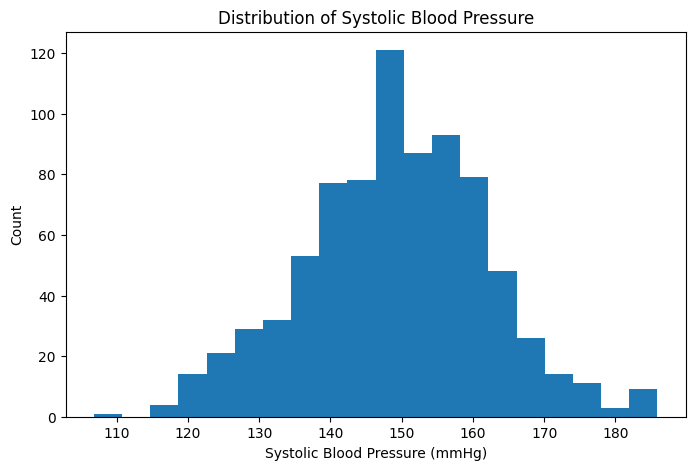

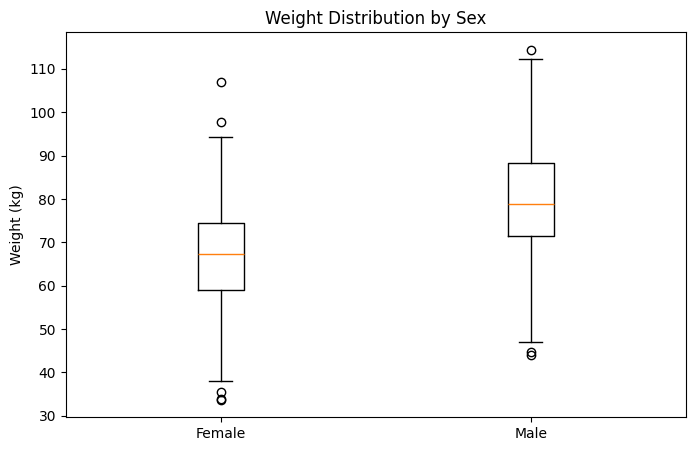

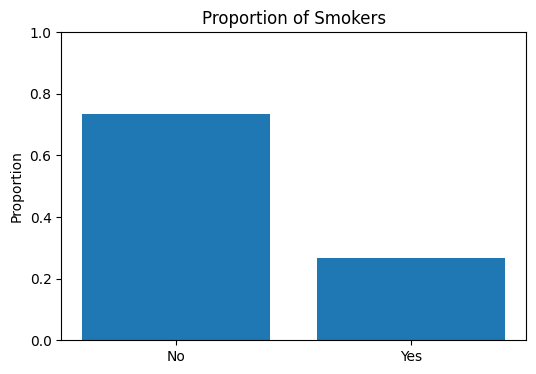

In [20]:
from visuals import plot_bp_hist
from visuals import plot_weight_box_by_sex
from visuals import plot_smoker_proportions

plot_bp_hist(df)
plot_weight_box_by_sex(df)
plot_smoker_proportions(df)


In [21]:
from analyzer import HealthAnalyzer
analyzer = HealthAnalyzer(df)
columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]
analyzer.describe(columns)


,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
median,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


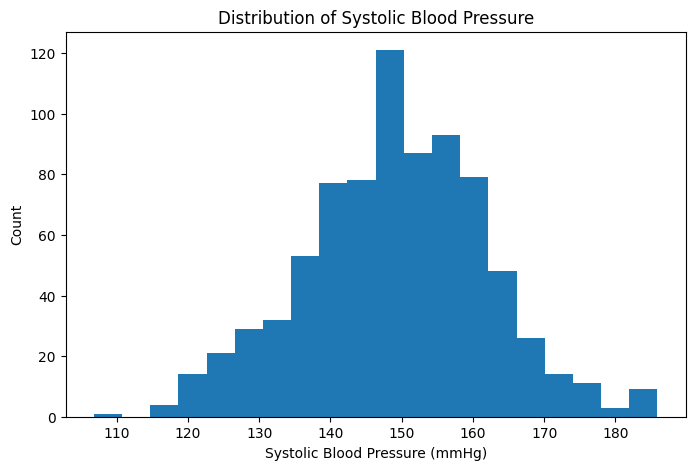

In [22]:
analyzer.plot_blood_pressure()

Linear regression model:

- Features (matrix X): age and weight
- Target (vector y): systolic blood pressure

The coefficients tell how BP changes with age/weight, holding the other variable constant.

In [23]:
from sklearn.linear_model import LinearRegression

# Feature matrix (n_samples x n_features)
X = df[["age", "weight"]]

# Target vector (n_samples,)
y = df["systolic_bp"]

model = LinearRegression()
model.fit(X, y)

coeff_age, coeff_weight = model.coef_
intercept = model.intercept_
r2 = model.score(X, y)

coeff_age, coeff_weight, intercept, r2

print(f"Intercept: {intercept:.3f}")
print(f"Coefficient (age): {coeff_age:.3f} mmHg per year")
print(f"Coefficient (weight): {coeff_weight:.3f} mmHg per kg")
print(f"R^2: {r2:.3f}")


Intercept: 109.499
Coefficient (age): 0.539 mmHg per year
Coefficient (weight): 0.178 mmHg per kg
R^2: 0.405


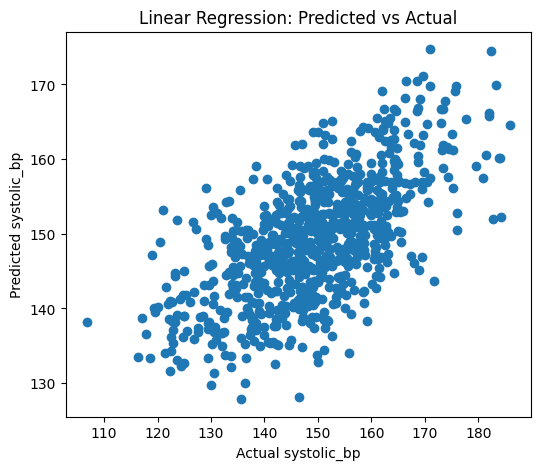

In [24]:
y_pred = model.predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred)
plt.xlabel("Actual systolic_bp")
plt.ylabel("Predicted systolic_bp")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()

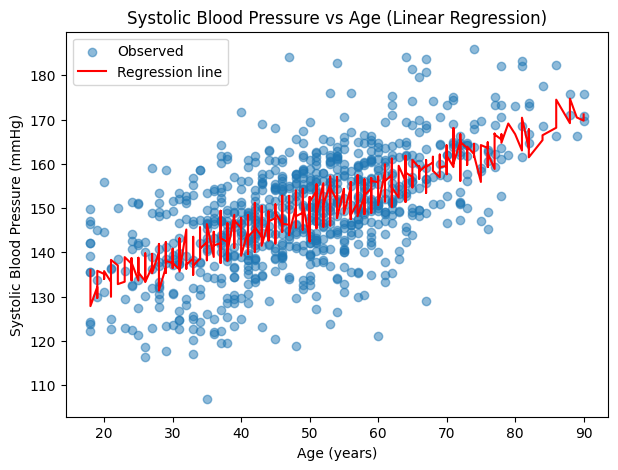

In [25]:
# Sort by age for a clean line
sorted_idx = np.argsort(df["age"])
age_sorted = df["age"].iloc[sorted_idx]
bp_sorted = df["systolic_bp"].iloc[sorted_idx]

# Predict using the trained model
X_sorted = df.loc[sorted_idx, ["age", "weight"]]
bp_pred_sorted = model.predict(X_sorted)

plt.figure(figsize=(7, 5))
plt.scatter(age_sorted, bp_sorted, alpha=0.5, label="Observed")
plt.plot(age_sorted, bp_pred_sorted, color="red", label="Regression line")
plt.xlabel("Age (years)")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.title("Systolic Blood Pressure vs Age (Linear Regression)")
plt.legend()
plt.show()


c:\Users\pappa\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


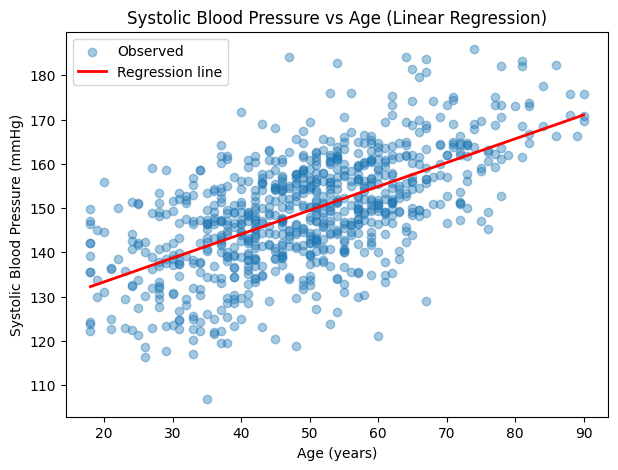

In [26]:
# Create a smooth age range
age_range = np.linspace(df["age"].min(), df["age"].max(), 100)

# Hold weight constant at its mean
mean_weight = df["weight"].mean()

X_line = np.column_stack([age_range, np.full_like(age_range, mean_weight)])
bp_line = model.predict(X_line)

plt.figure(figsize=(7, 5))
plt.scatter(df["age"], df["systolic_bp"], alpha=0.4, label="Observed")
plt.plot(age_range, bp_line, color="red", linewidth=2, label="Regression line")
plt.xlabel("Age (years)")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.title("Systolic Blood Pressure vs Age (Linear Regression)")
plt.legend()
plt.show()


## Summary of Findings
Data quality:
The dataset contains 800 participants and no missing values. Categorical variables (sex, smoker, disease) contain only expected categories, so no cleaning was required.

Descriptive statistics:\
Key health variables (age, height, weight, systolic BP, cholesterol) fall within plausible ranges for an adult population.

Visual exploration:
- Systolic blood pressure appears approximately unimodal in distribution.
- Weight differs in central tendency and spread by sex.
- Most participants are non-smokers (moderate class imbalance).

Simulation:\
The observed disease prevalence was used as a probability parameter to simulate 1000 individuals; the simulated prevalence was close to the observed value, with expected random variation.

Confidence interval:\
A 95% bootstrap confidence interval was computed for the mean systolic blood pressure, providing a plausible range for the population mean.

Hypothesis test:\
A one-sided Welch two-sample t-test was used to test whether smokers have higher mean systolic blood pressure than non-smokers. The conclusion is based on the p-value compared to α = 0.05. (No causal interpretation is made.)